In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [4]:
df.head(1)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0


In [5]:
df = df.iloc[:,1:]

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0, 0.5, 'Salary')

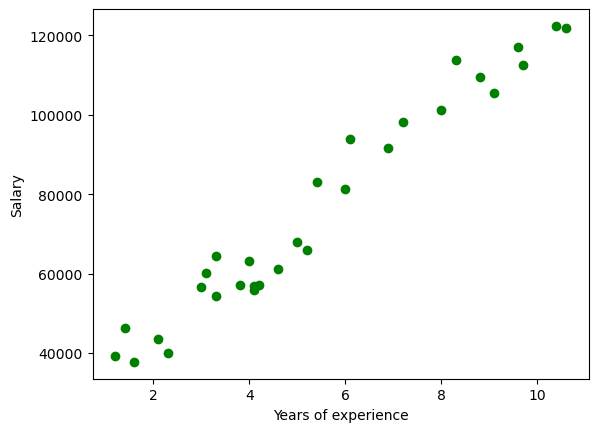

In [8]:
plt.scatter(df['YearsExperience'],df['Salary'], color = 'g')
plt.xlabel("Years of experience")
plt.ylabel("Salary")

In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [10]:
x= df[['YearsExperience']]
y=df[['Salary']]

In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scale = StandardScaler()

In [16]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [17]:
mean = scale.mean_
std_dev = scale.scale_
print(mean)
print(std_dev)

[5.2875]
[2.88116188]


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg  = LinearRegression()

In [20]:
reg.fit(x_train,y_train)

LinearRegression()

In [21]:
print("coefficient :",reg.coef_)
print("intercept :",reg.intercept_)

coefficient : [[27151.53742583]]
intercept : [74208.625]


Text(0, 0.5, 'salary')

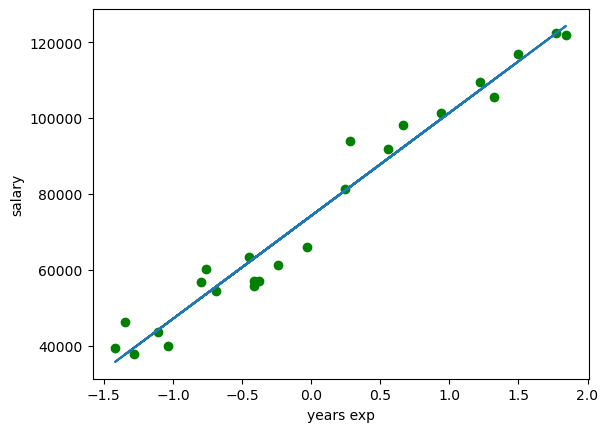

In [22]:
plt.plot(x_train, reg.predict(x_train))
plt.scatter(x_train, y_train, color ='green')
plt.xlabel("years exp")
plt.ylabel("salary")

In [23]:
y_pred = reg.predict(x_test)
y_pred

array([[115791.21011287],
       [ 71499.27809463],
       [102597.86866063],
       [ 75268.80422384],
       [ 55478.79204548],
       [ 60190.69970699]])

In [24]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

49830096.85590836
6286.453830757742
7059.043621901507


In [26]:
from sklearn.metrics import r2_score

In [27]:
r2=r2_score(y_test,y_pred)
print(r2)

0.9024461774180498


In [28]:
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adjusted_r2)

0.8780577217725622


Text(0, 0.5, 'predicted salary')

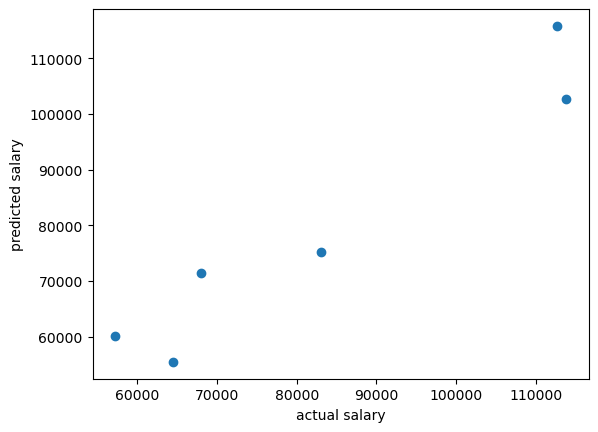

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("actual salary")
plt.ylabel("predicted salary")

In [30]:
error = y_test-y_pred
error

,Salary
27,-3155.210113
15,-3560.278095
23,11215.131339
17,7820.195776
8,8967.207955
9,-3000.699707


<Axes: ylabel='Density'>

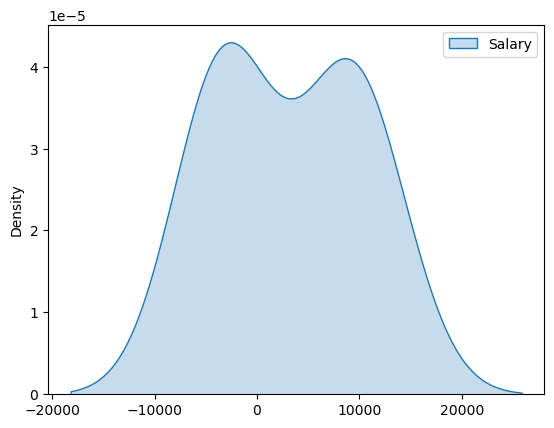

In [31]:
sns.kdeplot(error,fill=True)

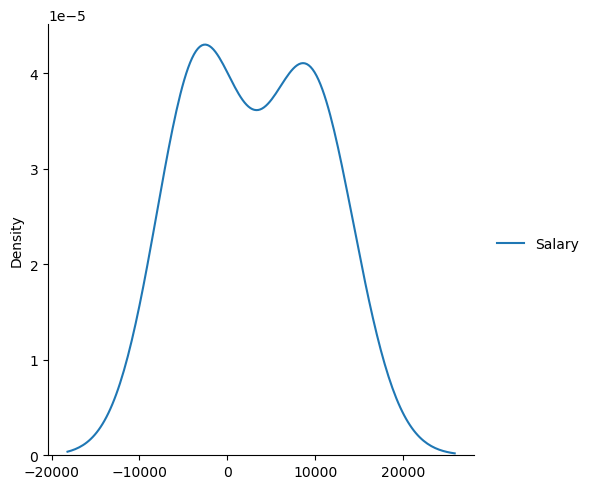

In [32]:
sns.displot(error,kind='kde')

In [33]:
# predicting salart for 5 years experience
# wrong way 
reg.predict([[5]])

array([[209966.31212917]])

In [34]:
# right way
reg.predict(scale.transform([[2]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[43227.83212554]])

In [35]:
import pickle

with open("salary_pred.pkl", "wb") as model_file:
    pickle.dump(reg, model_file)